In [3]:
#Load in required libraries, if you have not installed these libraries, you can use the install.packages command 
library(data.table)
library(tidyverse)
library(forecast)
library(lmtest)
library(plyr)
library(lmtest)
library(ggplot2)
library(scales)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
between():   dplyr, data.table
filter():    dplyr, stats
first():     dplyr, data.table
lag():       dplyr, stats
last():      dplyr, data.table
transpose(): purrr, data.table
Warning message:
"package 'forecast' was built under R version 3.4.3"Warning message:
"package 'lmtest' was built under R version 3.4.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
--------------------------------------------------

In [38]:
#read in the cleaned data file
data<-read_csv('C:\\Users\\Asus\\Desktop\\DataREACH\\Surveillance\\Tidy_Data\\Paludisme\\tidyPaludisme14-17.csv')

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  .default = col_integer(),
  Province = col_character(),
  Region = col_character(),
  `W 208` = col_character()
)
See spec(...) for full column specifications.


In [33]:
data

X1,Province,Region,W 1,W 2,W 3,W 4,W 5,W 6,W 7,...,W 199,W 200,W 201,W 202,W 203,W 204,W 205,W 206,W 207,W 208
1,ADAMAOUA,BANKIM,19,47,55,6,59,64,84,...,NA,19,69,127,48,20,52,56,59,NA
2,ADAMAOUA,BANYO,92,73,38,36,104,32,43,...,63,60,75,49,86,152,102,66,NA,NA
3,ADAMAOUA,DJOHONG,NA,0,97,23,83,85,24,...,41,75,68,68,19,26,38,27,31,NA
4,ADAMAOUA,MEIGANGA,24,32,32,12,NA,25,15,...,386,444,341,411,266,347,277,307,NA,NA
5,ADAMAOUA,NGAOUNDAL,NA,110,86,108,84,78,40,...,83,151,128,89,230,204,185,NA,222,NA
6,ADAMAOUA,NGAOUNDERE RURAL,379,377,367,318,346,251,282,...,1006,875,821,968,559,476,678,487,444,NA
7,ADAMAOUA,NGAOUNDERE URBAIN,509,533,613,552,524,443,473,...,1006,905,765,743,722,583,454,301,356,NA
8,ADAMAOUA,TIBATI,NA,82,58,59,76,82,50,...,152,312,320,339,186,296,178,170,113,NA
9,ADAMAOUA,TIGNERE,NA,86,168,153,76,131,157,...,266,148,290,287,295,255,166,15,125,NA
10,CENTRE,AKONOLINGA,9,16,13,16,10,7,18,...,178,97,69,89,104,76,45,65,35,NA


In [40]:
# Further cleaning for data
# remove NA at the end
data <- data[,-c(ncol(data))]
# set 56th and 71st row to zero due to NA
data[56,] <- seq(0,0,length.out=ncol(data))
data[71,] <- seq(0,0,length.out=ncol(data))

In [41]:
# Convert the numerical data to numerical type
cols = c(4:ncol(data));    
data[,cols] = apply(data[,cols], 2, function(x) as.numeric(as.character(x)))

In [42]:
data

X1,Province,Region,W 1,W 2,W 3,W 4,W 5,W 6,W 7,...,W 198,W 199,W 200,W 201,W 202,W 203,W 204,W 205,W 206,W 207
1,ADAMAOUA,BANKIM,19,47,55,6,59,64,84,...,NA,NA,19,69,127,48,20,52,56,59
2,ADAMAOUA,BANYO,92,73,38,36,104,32,43,...,NA,63,60,75,49,86,152,102,66,NA
3,ADAMAOUA,DJOHONG,NA,0,97,23,83,85,24,...,69,41,75,68,68,19,26,38,27,31
4,ADAMAOUA,MEIGANGA,24,32,32,12,NA,25,15,...,213,386,444,341,411,266,347,277,307,NA
5,ADAMAOUA,NGAOUNDAL,NA,110,86,108,84,78,40,...,44,83,151,128,89,230,204,185,NA,222
6,ADAMAOUA,NGAOUNDERE RURAL,379,377,367,318,346,251,282,...,960,1006,875,821,968,559,476,678,487,444
7,ADAMAOUA,NGAOUNDERE URBAIN,509,533,613,552,524,443,473,...,434,1006,905,765,743,722,583,454,301,356
8,ADAMAOUA,TIBATI,NA,82,58,59,76,82,50,...,158,152,312,320,339,186,296,178,170,113
9,ADAMAOUA,TIGNERE,NA,86,168,153,76,131,157,...,325,266,148,290,287,295,255,166,15,125
10,CENTRE,AKONOLINGA,9,16,13,16,10,7,18,...,116,178,97,69,89,104,76,45,65,35


In [43]:
# replace NA with mean of predecessor and follower
N <- nrow(data)
data_noNA <- as.tibble(cbind(data))
for ( r in 1:N ){
    for ( c in cols ){
        if (is.na(data[r,c])){
            # find the prev
            has_prev <- FALSE
            for (i in c:4){
                if (!is.na(data[r,i])){
                    has_prev <- TRUE
                    prev <- data[r,i]
                    break
                }
            } 
            # find post
            has_post <- FALSE
            for (j in c:ncol(data)){
                if (!is.na(data[r,j])){
                    has_post <- TRUE
                    post <- data[r,j]
                    break
                }
            }
            data_noNA[r,c] <- 0
            if (has_prev){
                data_noNA[r,c] <- data_noNA[r,c]+prev
            }
            if (has_post){
                data_noNA[r,c] <- (data_noNA[r,c]+post)/(1+has_prev)
            }
        } 
    }
}

In [44]:
r = 12
data_noNA[r,]
data[r,]
any(is.na(data_noNA))

X1,Province,Region,W 1,W 2,W 3,W 4,W 5,W 6,W 7,...,W 198,W 199,W 200,W 201,W 202,W 203,W 204,W 205,W 206,W 207
12,CENTRE,AYOS,4,29,27,17,18,25,63,...,20,21,7,22,21,24,10,23,18,15


X1,Province,Region,W 1,W 2,W 3,W 4,W 5,W 6,W 7,...,W 198,W 199,W 200,W 201,W 202,W 203,W 204,W 205,W 206,W 207
12,CENTRE,AYOS,4,29,27,17,18,25,63,...,20,21,7,22,21,24,10,23,18,15


[1] FALSE

In [12]:
index2region <- function(index){
    return( paste(data_noNA[index,3],data_noNA[index,2],sep=",") )
}

In [13]:
five_week_weighted_sum <- function(CrossCorr){
score <- 0
for (lag in -5:5){
    corr <- CrossCorr[lag][[1]]
    score <- score + 10.0/(abs(lag)+1)*corr
}
return(score)
}

In [14]:
### source: http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/xegbohtmlnode39.html
### source: https://stackoverflow.com/questions/15551209/cross-correlation-using-ccf-in-r
calc_upperCI <- function(T, confidence){
    CI <- qnorm((1 + confidence)/2)/sqrt(T)
    return (CI)
}

In [45]:
# compute score matrix
score_mat <- matrix(nrow=N, ncol=N)
# the (i,j) entry of score mat correspond to ccf(i,j)
for (i in 1:N){
    for (j in 1:N){
        if (j > i){
        TS1<-as.ts(as.numeric(data_noNA[i, 4:ncol(data_noNA)])) 
        TS2<-as.ts(as.numeric(data_noNA[j, 4:ncol(data_noNA)]))
        CrossCorr<-ccf(TS1, TS2, lag = 5, pl = FALSE)
        score_mat[i,j] <- five_week_weighted_sum(CrossCorr)
        }
    }
}

In [17]:
process_scores<- function(score_mat){
    # summary stats of scores
    scores = c(score_mat)
    print(summary(scores))
    print ( c("Mean: ",mean(scores,na.rm = TRUE)) )
    print( c("SD: ",sd(scores,na.rm = TRUE)) )
    hist(scores,
         breaks=50, freq=FALSE,
         main="Histogram of Correlation Scores",
         xlab="Correlation Score",
         col="steelblue")
    # heatmap of score matrix
    melted_score = melt(score_mat, na.rm = TRUE) 
    colnames(melted_score) <- c("Region1", "Region2", "Score")
    ggplot(data=melted_score, aes(x=Region1, y=Region2, fill=Score)) +
    geom_tile(colour="white") +
    scale_fill_gradient2(low = "#a6611a", high = "#018571", mid = "#f5f5f5", midpoint = 0)
}

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-23.664  -2.584   1.630   2.254   6.310  30.250   18330 
[1] "Mean: "           "2.25436931085803"
[1] "SD: "             "7.13874728659833"


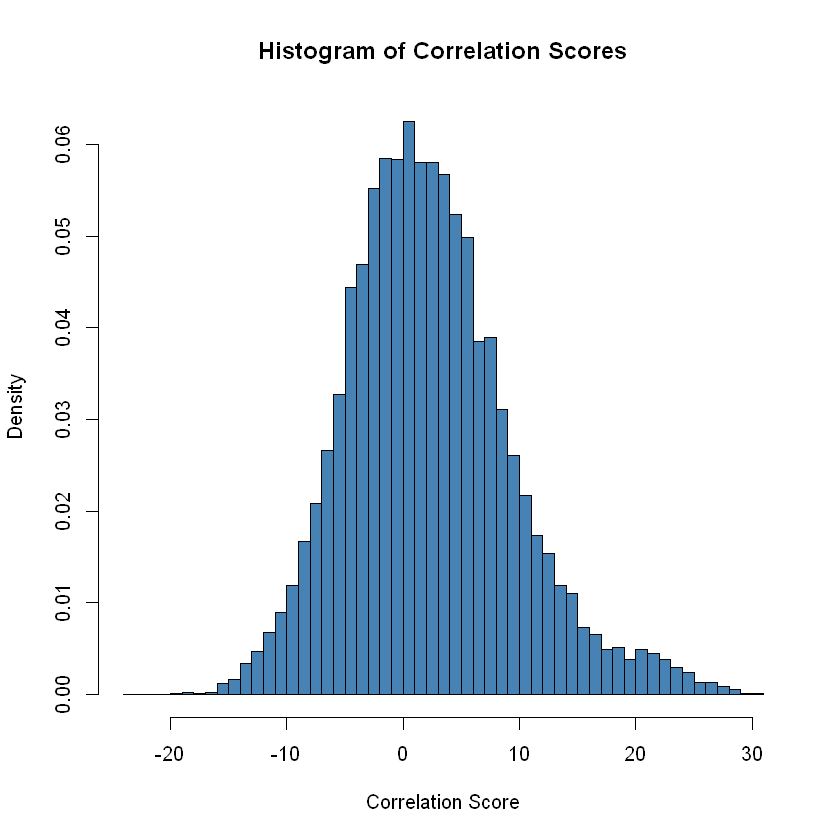

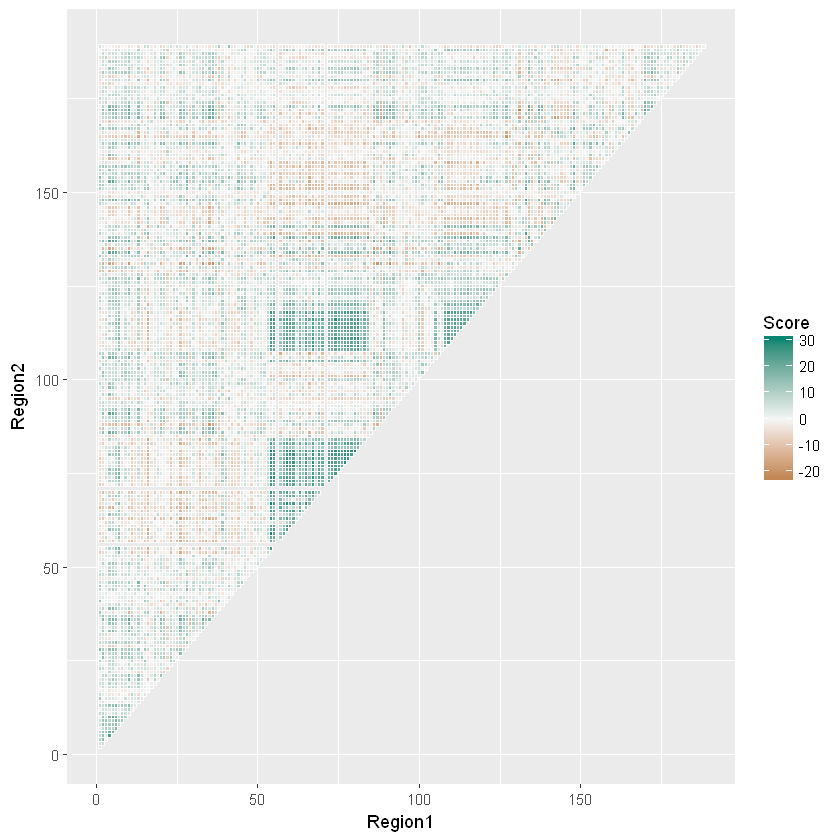

In [19]:
##########################
#       2014-2015        #
##########################
process_scores(score_mat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-20.294  -2.465   2.917   3.318   8.738  31.784   18330 
[1] "Mean: "           "3.31755785453829"
[1] "SD: "            "8.3647467570105"


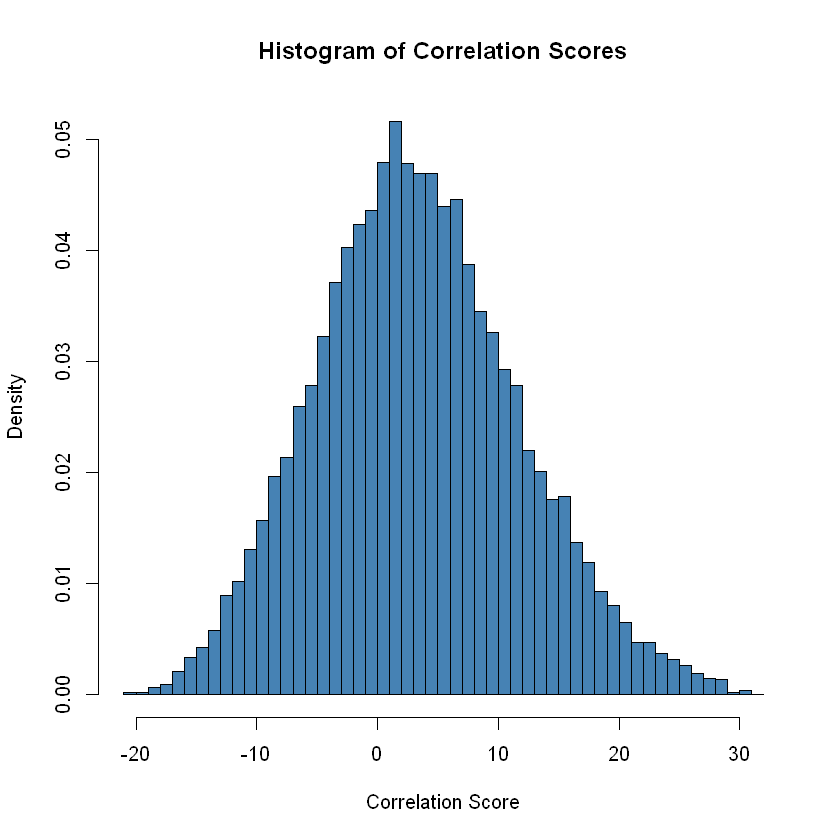

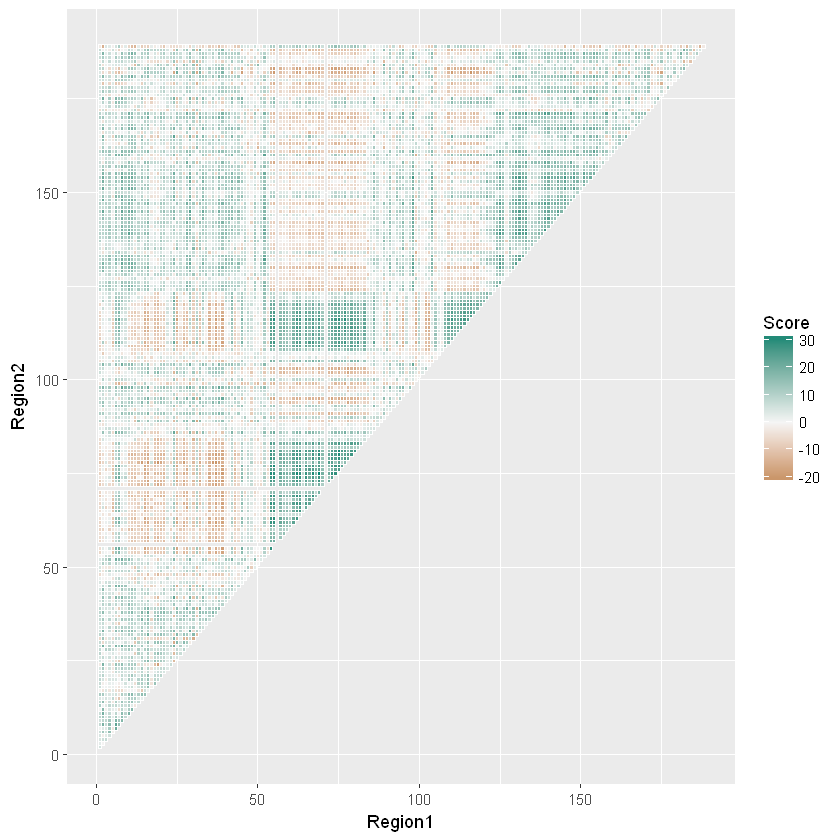

In [31]:
##########################
#       2016-2017        #
##########################
process_scores(score_mat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-24.216  -2.267   2.398   3.021   7.572  29.963   18330 
[1] "Mean: "          "3.0211042396914"
[1] "SD: "             "7.43567093477896"


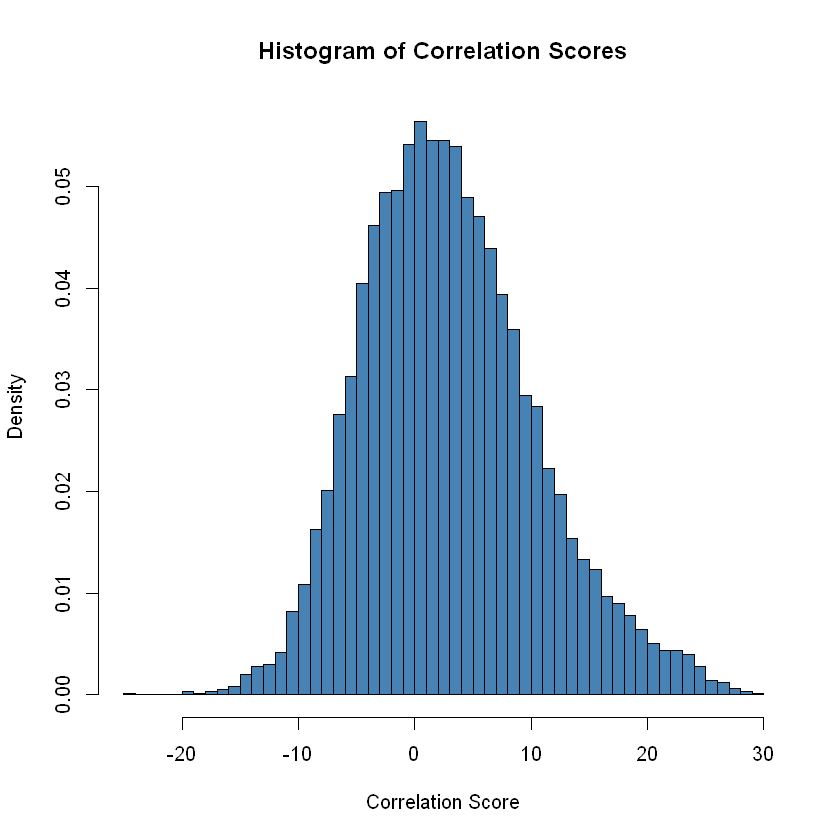

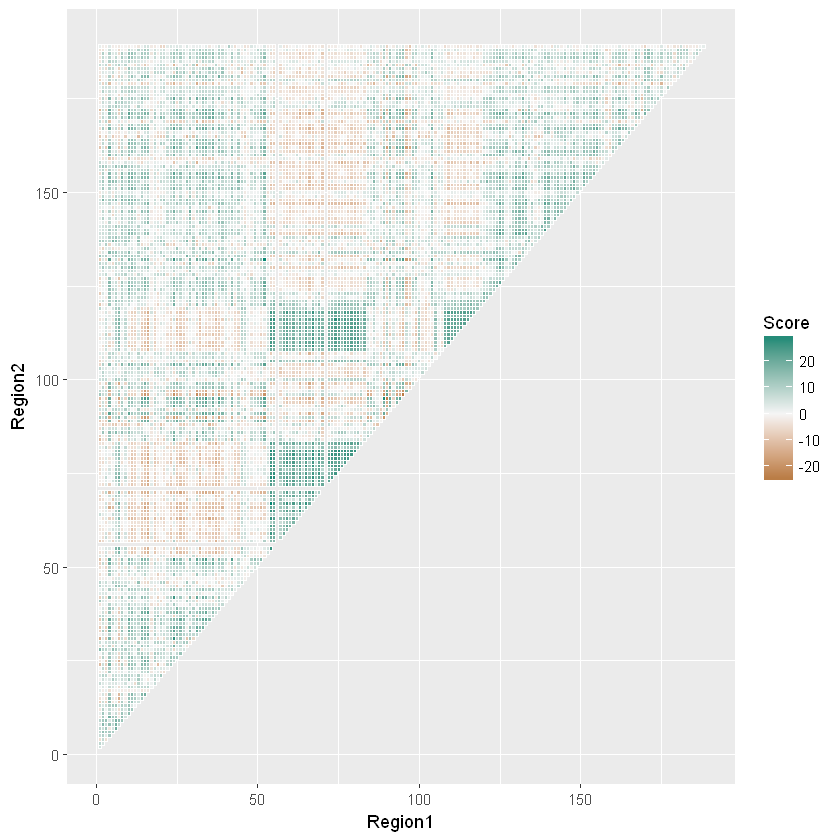

In [43]:
##########################
#       2014-2017        #
##########################
process_scores(score_mat)

In [18]:
# Given two indices, plot their corrsponding time series
# if ccf_disp is TRUE, also plot the output graph of ccf function
visualize_corr <- function(index1, index2, ccf_disp=FALSE){
    TS1<-ts(as.numeric(data_noNA[index1, 4:ncol(data_noNA)])) 
    TS2<-ts(as.numeric(data_noNA[index2, 4:ncol(data_noNA)]))

    ts.plot(TS1, TS2,
           gpars=list(xlab="Week", ylab="Cases", col=c("red","blue")))
    legend("topleft",legend=c( paste(toString(index1),index2region(index1)), paste(toString(index2),index2region(index2))),
           col=c("red", "blue"),lty=c(1,1))

    CrossCorr<-ccf(TS1, TS2, lag = 5, pl = ccf_disp)
    score <- five_week_weighted_sum(CrossCorr)[[1]]

    title(sub = paste( "Correlation Score =",toString(score) ))
    if (ccf_disp){
        upperCI <- calc_upperCI(CrossCorr$n.used, 0.95)
        lowerCI <- -upperCI
        # verify CI
        lags <- -5:5
        my_upperCI <- rep(upperCI,11)
        points(lags, my_upperCI, col = "red")
        my_lowerCI <- rep(lowerCI,11)
        points(lags, my_lowerCI, col = "red")
        }
}

In [24]:
# Given a score matrix, and an interger k
# visualize_corr for top/bottom k scores(depending on the value of top)
# in the increasing order of scores
# ccf_disp dictates if the output graph of ccf is displayed
visualize_top_k <- function(score_mat, k, top=TRUE, ts_disp=TRUE, ccf_disp=FALSE){
    sorted_scores = sort(c(score_mat))
    bottom_k = sorted_scores[1:k]
    top_k = tail(sorted_scores,k)
    print(top_k)
    pairs<-c()
    if (top) {k_scores<-top_k} else {k_scores<-bottom_k}
    for (score in k_scores){
        index_pair = which(score_mat == score, arr.ind = TRUE)
        i<-index_pair[1]
        j<-index_pair[2]
        pairs<-c(pairs,paste(index2region(i),'X',index2region(j)))
        if (ts_disp) {
            visualize_corr(i,j,ccf_disp)
        }
    }
    print(pairs)
}

In [27]:
# 14-15 top10 region pairs
visualize_top_k(score_mat,10,top=TRUE,ts_disp=FALSE,ccf_disp=FALSE)

 [1] 28.37783 28.39940 28.40757 28.41047 28.53248 28.56281 29.29763 29.54821
 [9] 30.10915 30.25025
 [1] "GUIDIGUIS,EXTREME NORD X MOUTOURWA,EXTREME NORD"  
 [2] "BOGO,EXTREME NORD X MOGODE,EXTREME NORD"          
 [3] "ROUA,EXTREME NORD X TOKOMBERE,EXTREME NORD"       
 [4] "MOULVOUDAYE,EXTREME NORD X TOKOMBERE,EXTREME NORD"
 [5] "MOGODE,EXTREME NORD X MAYO OULO,NORD"             
 [6] "MOGODE,EXTREME NORD X TOKOMBERE,EXTREME NORD"     
 [7] "BOGO,EXTREME NORD X GUIDIGUIS,EXTREME NORD"       
 [8] "MAGA,EXTREME NORD X TOKOMBERE,EXTREME NORD"       
 [9] "BOGO,EXTREME NORD X MAGA,EXTREME NORD"            
[10] "BOGO,EXTREME NORD X TOKOMBERE,EXTREME NORD"       


In [37]:
# 16-17 top10 region pairs
visualize_top_k(score_mat,10,top=TRUE,ts_disp=FALSE,ccf_disp=FALSE)

 [1] 29.80112 29.81979 30.21521 30.29735 30.35217 30.43171 30.74566 30.78954
 [9] 30.96861 31.78393
 [1] "MAGA,EXTREME NORD X TOKOMBERE,EXTREME NORD"    
 [2] "MOULVOUDAYE,EXTREME NORD X MAYO OULO,NORD"     
 [3] "BOGO,EXTREME NORD X MOKOLO,EXTREME NORD"       
 [4] "MOKOLO,EXTREME NORD X ROUA,EXTREME NORD"       
 [5] "BOURHA,EXTREME NORD X MAYO OULO,NORD"          
 [6] "MAGA,EXTREME NORD X MOKOLO,EXTREME NORD"       
 [7] "MOKOLO,EXTREME NORD X TOKOMBERE,EXTREME NORD"  
 [8] "BOURHA,EXTREME NORD X MOULVOUDAYE,EXTREME NORD"
 [9] "KAR HAY,EXTREME NORD X MOKOLO,EXTREME NORD"    
[10] "MAROUA 1,EXTREME NORD X MOKOLO,EXTREME NORD"   


In [46]:
# 14-17 top10 region pairs
visualize_top_k(score_mat,10,top=TRUE,ts_disp=FALSE,ccf_disp=FALSE)

 [1] 27.55868 27.86995 28.13868 28.25256 28.30746 28.42113 28.86744 28.93357
 [9] 29.80153 29.96320
 [1] "BOGO,EXTREME NORD X MOULVOUDAYE,EXTREME NORD"
 [2] "MOGODE,EXTREME NORD X MAYO OULO,NORD"        
 [3] "MAGA,EXTREME NORD X TOKOMBERE,EXTREME NORD"  
 [4] "BOGO,EXTREME NORD X MOGODE,EXTREME NORD"     
 [5] "BOGO,EXTREME NORD X PETTE,EXTREME NORD"      
 [6] "MOKOLO,EXTREME NORD X TOKOMBERE,EXTREME NORD"
 [7] "BOGO,EXTREME NORD X TOKOMBERE,EXTREME NORD"  
 [8] "DIBOMBARI,LITTORAL X MANOKA,LITTORAL"        
 [9] "NGUELEMENDOUKA,EST X MBENGWI,NORD OUEST"     
[10] "BOGO,EXTREME NORD X MAGA,EXTREME NORD"       
